## [한국어 텍스트 전처리 ]

In [1]:
import urllib.request as req
import pandas as pd
from konlpy.tag import Okt
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

#### (1) 데이터 준비

In [2]:
naver_url="https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt"
filename='rating.txt'

In [3]:
# URL에 존재하는 데이터를 파일로 저장
fn, obj =req.urlretrieve(naver_url, filename)
print(fn)

rating.txt


- DataFrame으로 변환

In [4]:
dataDF=pd.read_table(filename)

In [5]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [6]:
print( dataDF.head(), dataDF.tail() , sep='\n\n')

         id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1

             id                             document  label
199995  8963373                       포켓 몬스터 짜가 ㅡㅡ;;      0
199996  3302770                                쓰.레.기      0
199997  5458175    완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.      0
199998  6908648  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ      0
199999  8548411                      포풍저그가나가신다영차영차영차      0


In [7]:
## 샘플 데이터 추출
sample_datas=dataDF[:100].copy()
sample_datas.shape

(100, 3)

#### [ 데이터 전처리 ]

(1) 한글, 공백 제외한 문자들 제거 ==> 정규표현식

In [ ]:
# 한글 제외한 나머지를 의미하는 정규 표현식 패턴 
hangul_wspace= "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]"

In [9]:
# Series에서 문자열 accessor 활용한 불필요 문자 제거 
sample_datas['document'] = sample_datas['document'].str.replace(hangul_wspace,"", regex=True)

In [31]:
sample_datas[:10]

id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...      1
2   4655635                   폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고      1
3   9251303   와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지      1
4  10067386                         안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화      1
5   2190435                      사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화      1
6   9279041                                   완전 감동입니다 다시봐도 감동      1
7   7865729                           개들의 전쟁 나오나요 나오면 빠로 보고 싶음      1
8   7477618                                                  굿      1
9   9250537                                     바보가 아니라 병 쉰 인듯      1

(2) 불용어 리스트 생성

In [32]:
stop_words=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [12]:
stopwords_file = './koreanStopwords_unique.txt'

with open(stopwords_file, mode='r', encoding='utf-8') as f:
    stop_words = f.readlines()
    
stop_words = [word.replace('\n','') for word in stop_words] 

(3) 형태소 분석

In [13]:
okt_tokenizer= Okt()

In [14]:
# 문장 마다 토큰 분리
token_datas=[]
for sentence in sample_datas.document:
    wtoken=okt_tokenizer.morphs(sentence)
    ww=[w for w in wtoken if w not in stop_words]
    token_datas.append(ww)

In [15]:
len(token_datas)

100

In [16]:
wordList=[]
for tt in token_datas:
    print(tt)
    wordList += tt

['어릴', '보고', '봐도', '재밌어요', 'ㅋㅋ']
['디자인', '배우는', '학생', '외국', '디자이너', '일군', '전통', '통해', '발전', '해가는', '문화', '산업', '부러웠는데', '우리나라', '에서도', '어려운', '시절', '끝', '열정', '지킨', '노라노', '같은', '전통', '있어', '같은', '꿈', '꾸고', '이뤄', '나갈', '수', '있다는', '감사합니다']
['폴리스스토리', '시리즈', '뉴', '버릴께', '도', '없음', '최고']
['연기', '진짜', '쩔구나', '지루할거라고', '했는데', '몰입', '해서', '봤다', '이런게', '진짜', '영화']
['안개', '자욱한', '밤하늘', '떠', '있는', '초승달', '같은', '영화']
['사랑', '해본', '라면', '처음', '끝', '웃을수', '있는', '영화']
['완전', '감동', '입니다', '봐도', '감동']
['전쟁', '나오나요', '나오면', '빠', '보고', '싶음']
['굿']
['바보', '아니라', '병', '쉰', '인듯']
['나이', '같은', '영화', '본', '감동', '훗날', '보면대', '사하나', '감정', '완벽하게', '이해', '할것만']
['재밌다']
['고질', '라니', '무', '귀엽다', '능', 'ㅋㅋ']
['영화', '오페라', '화', '라고', '해야', '할', '작품', '극단', '평', '갈림', '어쩔', '수', '없는', '듯']
['도', '반전', '좋았']
['평점', '낮아', '긴장감', '스릴', '감', '진짜', '최고', '인데', '진짜', '전장', '느끼는', '공포', '생생하게', '전', '해준다']
['고시', '터', '랑', '소재', '만', '같을', '뿐', '아무런', '관련', '없음']
['단연', '최고']
['가면', '갈수록', '더욱', '빠져', '드', '요', '밀회', '화이팅'

In [17]:
len(wordList), wordList[:10]

(933, ['어릴', '보고', '봐도', '재밌어요', 'ㅋㅋ', '디자인', '배우는', '학생', '외국', '디자이너'])

#### (4) 단어집합 생성

- (4-1) 단어빈도수 Dict 생성

In [18]:
key_list= set(wordList)
len(key_list), key_list

(684,
 {'ㄷㄷ',
  'ㅆ',
  'ㅇ',
  'ㅇㅇ',
  'ㅋ',
  'ㅋㅋ',
  'ㅋㅋㅋ',
  'ㅋㅋㅋㅋ',
  'ㅎ',
  'ㅠ',
  'ㅠㅠ',
  'ㅡㅡ',
  '가고싶은',
  '가면',
  '가슴속',
  '가을',
  '가을로',
  '가족',
  '각심',
  '갈림',
  '갈수록',
  '감',
  '감독',
  '감동',
  '감사합니다',
  '감정',
  '감탄',
  '갔다해',
  '강렬한',
  '강압',
  '강추',
  '같더라고요',
  '같아요',
  '같은',
  '같을',
  '걍',
  '거',
  '거려',
  '거슬려서',
  '걱정',
  '걸',
  '걸고',
  '겁나',
  '게',
  '격투씬',
  '결말',
  '경',
  '경찰서',
  '계속',
  '고시',
  '고질',
  '공간',
  '공포',
  '관련',
  '광',
  '괜찬',
  '굉장히',
  '교복',
  '굳',
  '굿',
  '굿굿굿',
  '권력',
  '귀엽다',
  '그거',
  '그냥',
  '그대',
  '그라샴',
  '그런대',
  '극단',
  '극적',
  '기다려야',
  '기대',
  '기억',
  '긴장감',
  '까지봣다',
  '깨우쳐',
  '깨워주는',
  '꺼내기도',
  '꼭',
  '꾸고',
  '꿈',
  '뀰잼',
  '끝',
  '끼리',
  '나갈',
  '나도',
  '나불',
  '나빠지는데가',
  '나오나요',
  '나오네',
  '나오는구만',
  '나오다니',
  '나오면',
  '나온',
  '나왔으면',
  '나이',
  '난',
  '남기남',
  '남는다',
  '남은',
  '남자',
  '납득',
  '낮게주는',
  '낮아',
  '낮은',
  '내내',
  '내려야',
  '내용',
  '냉장고',
  '냐',
  '너무',
  '너무하다',
  '넘',
  '년내',
  '년전',
  '노동자',
  '노라노',
  '농아인',
  '눈',
 

In [20]:
# 단어 / 토큰별 빈도 수 저장을 위한 dict => 0으로 초기화 
voca={ key: 0 for key in key_list}
voca

{'아무': 0,
 '짜리': 0,
 '세우는': 0,
 '재밌게': 0,
 '어설픈건': 0,
 '대체': 0,
 '이영자': 0,
 '탄탄하고': 0,
 '뻔한': 0,
 '이양': 0,
 '몰입': 0,
 '초롱': 0,
 '봤음': 0,
 '오는건데': 0,
 'ㅇㅇ': 0,
 '어디서': 0,
 '학생': 0,
 '함': 0,
 '같아요': 0,
 '우정': 0,
 '굉장히': 0,
 '잊을': 0,
 '너무하다': 0,
 'ㅇ': 0,
 '이구': 0,
 '화질': 0,
 '계속': 0,
 '눈부신': 0,
 '드래곤볼': 0,
 '라면': 0,
 '씬': 0,
 '원표': 0,
 '거려': 0,
 '있었다': 0,
 '신동엽': 0,
 '시절': 0,
 '상당한': 0,
 '해가는': 0,
 '많이': 0,
 '여러': 0,
 '이라': 0,
 '커': 0,
 '일텐데': 0,
 '액션': 0,
 '잠도': 0,
 '없는': 0,
 '더욱': 0,
 '한번': 0,
 '콜텍': 0,
 '시키고': 0,
 '최고다': 0,
 '버릴께': 0,
 '감독': 0,
 '영상': 0,
 '원주율': 0,
 '샤방샤방했던': 0,
 '해본': 0,
 '순위': 0,
 '사라질것이다': 0,
 '다시는': 0,
 '깨우쳐': 0,
 '평': 0,
 '친구': 0,
 '하는': 0,
 '의리': 0,
 '낮게주는': 0,
 '한가지': 0,
 '연기': 0,
 '스릴러': 0,
 '우연히': 0,
 '대한민국': 0,
 '용이': 0,
 '완전': 0,
 '안될': 0,
 '요즘': 0,
 '가고싶은': 0,
 '성추행': 0,
 '음악': 0,
 '재밋었다': 0,
 '없네': 0,
 '삼일': 0,
 '내려야': 0,
 '밤하늘': 0,
 '못': 0,
 '요': 0,
 '정말재밋': 0,
 '봐요': 0,
 '비디오': 0,
 '마디': 0,
 '좋았다': 0,
 '본방': 0,
 '장면': 0,
 '보다는': 0,
 '흥미진진': 0,
 'ㅋ': 0,
 

In [ ]:
# 빈도 수 추가
for word in wordList:
    voca[word] += 1

In [29]:
# 단어 및 토큰 빈도 수 확인
voca.get('ㅋㅋ', 0)

5

In [31]:
# 데이터프레임에 저장
vocaDF=pd.DataFrame([voca]).T
vocaDF

0
아무    1
짜리    1
세우는   1
재밌게   3
어설픈건  1
...  ..
경     1
오랜    1
일군    1
느끼는   1
공간    1

[684 rows x 1 columns]

In [32]:
vocaDF2=vocaDF.sort_values(0, ascending=False)
vocaDF2

0
영화    27
너무    10
최고    10
도     10
정말     8
...   ..
걸고     1
여러가지   1
고시     1
브라질    1
공간     1

[684 rows x 1 columns]

In [33]:
vocaDF2[0].unique()

array([27, 10,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [34]:
# 빈도 수에 따른 단어 수 확인
vocaDF2[0].value_counts()

0
1     577
2      61
3      22
6       5
5       5
4       5
7       4
10      3
27      1
8       1
Name: count, dtype: int64

In [ ]:
# 1번 이상
vocaDF2[vocaDF2[0]>1].shape

(107, 1)

In [ ]:
# 1번만
vocaDF2[vocaDF2[0]==1].shape

(577, 1)

In [37]:
vc=vocaDF2[0].value_counts()
vc.shape, vc.index

((10,), Index([1, 2, 3, 6, 5, 4, 7, 10, 27, 8], dtype='int64', name=0))

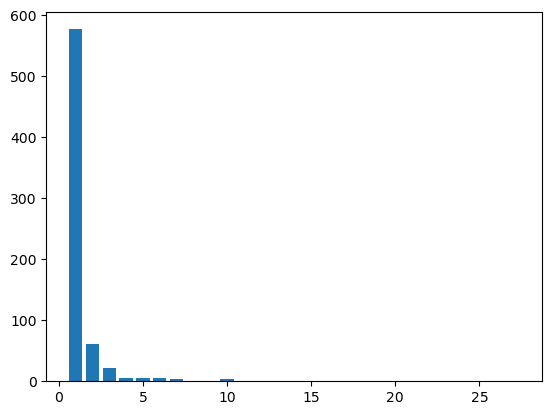

In [ ]:
# 단어의 빈도 분포 수 확인
plt.bar(vc.index, vc)
plt.show()

- nltk FreqDist 사용

In [ ]:
# NLTK의 Counter 기반 단어사전 생성
# 빈도를 가지고 단어 집합 생성
vocab = FreqDist(np.hstack(token_datas))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 684


In [ ]:
# 빈도 수 확인
vocab['영화']

27

In [43]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print(f'단어 집합의 크기 : {len(vocab)}')

단어 집합의 크기 : 500


In [44]:
for index, word in enumerate(vocab):
    print(index, word)

0 ('영화', 27)
1 ('도', 10)
2 ('최고', 10)
3 ('너무', 10)
4 ('정말', 8)
5 ('진짜', 7)
6 ('감동', 7)
7 ('본', 7)
8 ('다', 7)
9 ('수', 6)
10 ('연기', 6)
11 ('할', 6)
12 ('만', 6)
13 ('봤는데', 6)
14 ('ㅋㅋ', 5)
15 ('같은', 5)
16 ('마음', 5)
17 ('거', 5)
18 ('뭐', 5)
19 ('보고', 4)
20 ('평점', 4)
21 ('요', 4)
22 ('못', 4)
23 ('하는', 4)
24 ('어릴', 3)
25 ('봐도', 3)
26 ('했는데', 3)
27 ('화', 3)
28 ('인데', 3)
29 ('랑', 3)
30 ('된', 3)
31 ('인', 3)
32 ('마지막', 3)
33 ('대한', 3)
34 ('명작', 3)
35 ('최고다', 3)
36 ('재밌게', 3)
37 ('봄', 3)
38 ('친구', 3)
39 ('라', 3)
40 ('느낌', 3)
41 ('남자', 3)
42 ('매력', 3)
43 ('ㅎ', 3)
44 ('게', 3)
45 ('재밌습니다', 3)
46 ('전통', 2)
47 ('문화', 2)
48 ('우리나라', 2)
49 ('에서도', 2)
50 ('끝', 2)
51 ('없음', 2)
52 ('해서', 2)
53 ('봤다', 2)
54 ('있는', 2)
55 ('사랑', 2)
56 ('라면', 2)
57 ('처음', 2)
58 ('완전', 2)
59 ('굿', 2)
60 ('감정', 2)
61 ('라고', 2)
62 ('작품', 2)
63 ('없는', 2)
64 ('긴장감', 2)
65 ('갈수록', 2)
66 ('더욱', 2)
67 ('없이', 2)
68 ('역시', 2)
69 ('없다', 2)
70 ('용서', 2)
71 ('비판', 2)
72 ('영상', 2)
73 ('한번', 2)
74 ('보고싶다', 2)
75 ('아름답고', 2)
76 ('기억', 2)
77 ('합니다

(5) 수치화

(5-1) 정수 인코딩

In [46]:
# 스페셜 토큰 추가 : unk, pad
word_to_index = {word : index + 2 for index, word in enumerate(voca)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [47]:
word_to_index

{'아무': 2,
 '짜리': 3,
 '세우는': 4,
 '재밌게': 5,
 '어설픈건': 6,
 '대체': 7,
 '이영자': 8,
 '탄탄하고': 9,
 '뻔한': 10,
 '이양': 11,
 '몰입': 12,
 '초롱': 13,
 '봤음': 14,
 '오는건데': 15,
 'ㅇㅇ': 16,
 '어디서': 17,
 '학생': 18,
 '함': 19,
 '같아요': 20,
 '우정': 21,
 '굉장히': 22,
 '잊을': 23,
 '너무하다': 24,
 'ㅇ': 25,
 '이구': 26,
 '화질': 27,
 '계속': 28,
 '눈부신': 29,
 '드래곤볼': 30,
 '라면': 31,
 '씬': 32,
 '원표': 33,
 '거려': 34,
 '있었다': 35,
 '신동엽': 36,
 '시절': 37,
 '상당한': 38,
 '해가는': 39,
 '많이': 40,
 '여러': 41,
 '이라': 42,
 '커': 43,
 '일텐데': 44,
 '액션': 45,
 '잠도': 46,
 '없는': 47,
 '더욱': 48,
 '한번': 49,
 '콜텍': 50,
 '시키고': 51,
 '최고다': 52,
 '버릴께': 53,
 '감독': 54,
 '영상': 55,
 '원주율': 56,
 '샤방샤방했던': 57,
 '해본': 58,
 '순위': 59,
 '사라질것이다': 60,
 '다시는': 61,
 '깨우쳐': 62,
 '평': 63,
 '친구': 64,
 '하는': 65,
 '의리': 66,
 '낮게주는': 67,
 '한가지': 68,
 '연기': 69,
 '스릴러': 70,
 '우연히': 71,
 '대한민국': 72,
 '용이': 73,
 '완전': 74,
 '안될': 75,
 '요즘': 76,
 '가고싶은': 77,
 '성추행': 78,
 '음악': 79,
 '재밋었다': 80,
 '없네': 81,
 '삼일': 82,
 '내려야': 83,
 '밤하늘': 84,
 '못': 85,
 '요': 86,
 '정말재밋': 87,
 '봐요': 88,
 '비디오'

(5)문장 수치화

In [48]:
encoded = []
for line in token_datas: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [49]:
encoded

[[310, 634, 152, 322, 662],
 [412,
  609,
  18,
  602,
  391,
  683,
  468,
  282,
  621,
  39,
  612,
  605,
  525,
  314,
  227,
  194,
  37,
  368,
  233,
  428,
  485,
  479,
  468,
  191,
  479,
  129,
  465,
  211,
  192,
  496,
  245,
  206],
 [272, 482, 179, 53, 343, 197, 622],
 [69, 237, 542, 361, 675, 12, 201, 296, 444, 237, 256],
 [357, 447, 84, 209, 418, 532, 479, 256],
 [210, 58, 31, 434, 368, 290, 418, 256],
 [74, 369, 599, 152, 369],
 [394, 563, 189, 174, 634, 647],
 [166],
 [146, 262, 407, 348, 502],
 [117, 479, 256, 386, 369, 374, 640, 207, 236, 378, 364, 215],
 [469],
 [315, 593, 165, 365, 216, 662],
 [256, 608, 144, 279, 332, 312, 241, 480, 63, 223, 476, 496, 47, 181],
 [343, 625, 493],
 [564, 419, 518, 507, 487, 237, 622, 229, 237, 572, 684, 463, 344, 408, 118],
 [252, 491, 142, 556, 663, 195, 218, 137, 543, 197],
 [586, 622],
 [346, 659, 48, 212, 553, 86, 676, 466],
 [530, 500, 38, 496, 255, 386, 256, 539, 622, 193, 384, 182, 141, 527],
 [682, 663, 386, 162, 406, 3

- 패딩

In [ ]:
# 길이 맞추는 3가지 방법 : 최대 길이, 최소 길이, 평균 길이 
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

리뷰의 최대 길이 : 41
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 9.330000


In [51]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [52]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 41
리뷰의 최소 길이 : 41
리뷰의 평균 길이 : 41.000000


In [53]:
print(encoded[:3])

[[310, 634, 152, 322, 662, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [412, 609, 18, 602, 391, 683, 468, 282, 621, 39, 612, 605, 525, 314, 227, 194, 37, 368, 233, 428, 485, 479, 468, 191, 479, 129, 465, 211, 192, 496, 245, 206, 1, 1, 1, 1, 1, 1, 1, 1, 1], [272, 482, 179, 53, 343, 197, 622, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
